In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
df = pd.read_csv("KS_train_final.csv")

In [13]:
X = df.drop(['funded', 'is_cat_music', 'is_cat_film', 'is_cat_publishing', 'is_cat_games', 'is_cat_fashion',
            'is_cat_comics', 'is_cat_other', 'is_country_us', 'is_loc_ca', 'is_loc_ny', 'is_loc_uk',
            'is_loc_tx', 'is_loc_cd', 'is_loc_fl', 'is_loc_il', 'is_loc_wa', 'is_loc_pa',
            'is_loc_other', 'is_2009', 'is_2017', 'is_2018', 'sentiment_pos', 'sentiment_neu',
            'sentiment_neg'], axis=1)
y = df['funded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, max_features='sqrt', random_state = 42)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [14]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 7727  2586]
 [ 2081 11515]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77     10313
         1.0       0.82      0.85      0.83     13596

    accuracy                           0.80     23909
   macro avg       0.80      0.80      0.80     23909
weighted avg       0.80      0.80      0.80     23909



=== All AUC Scores ===
[0.77130413 0.89190462 0.83992383 0.88043802 0.93661465 0.90474802
 0.86139445 0.86771558 0.90515923 0.85832724]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8717529782595166


In [15]:
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: blurb_bayes          Importance: 0.53
Variable: log_goal_usd         Importance: 0.12
Variable: staff_pick           Importance: 0.1
Variable: log_days_to_launch   Importance: 0.05
Variable: is_2012              Importance: 0.03
Variable: is_2015              Importance: 0.03
Variable: log_days_to_dealine  Importance: 0.03
Variable: is_2011              Importance: 0.02
Variable: is_2013              Importance: 0.02
Variable: is_2014              Importance: 0.02
Variable: is_cat_art           Importance: 0.01
Variable: is_cat_technology    Importance: 0.01
Variable: is_cat_food          Importance: 0.01
Variable: is_2010              Importance: 0.01
Variable: is_2016              Importance: 0.01


In [18]:
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot',
feature_names = X.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree(refined).png');

In [17]:
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree(refined).png')

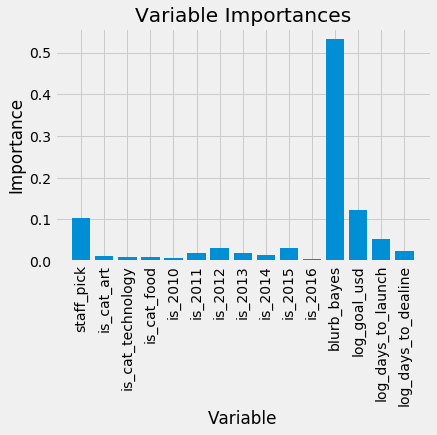

In [19]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, X.columns, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');